# 01 - Data Exploration: Healthcare Readmission

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("diabetic_data.csv")
print("Shape:", df.shape)
df.head()


Shape: (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:

print("\n=== Dataset Info ===")
df.info()

print("\n=== Missing Value Summary ===")
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0].head(20))



=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-

In [3]:

df = df.replace('?', np.nan)
print("\n=== Descriptive Statistics ===")
display(df.describe(include='all').T.head(20))



=== Descriptive Statistics ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983457,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,99493,5,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,3197,9,[75-100),1336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


In [4]:

target_candidates = [c for c in df.columns if 'readmit' in c.lower() or 'target' in c.lower()]
if target_candidates:
    target_col = target_candidates[0]
    print(f"Detected Target Column: {target_col}")
    print(df[target_col].value_counts())
else:
    print("⚠️ No clear target column found. Please check column names.")


Detected Target Column: readmitted
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


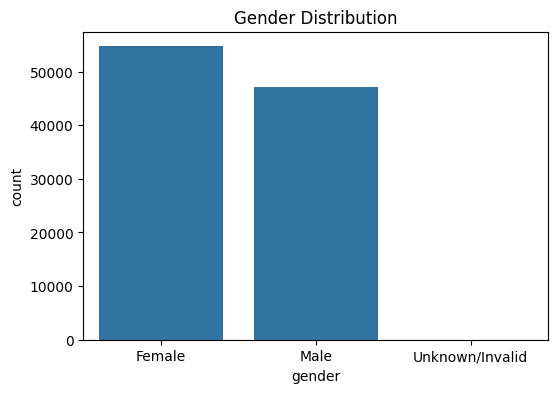

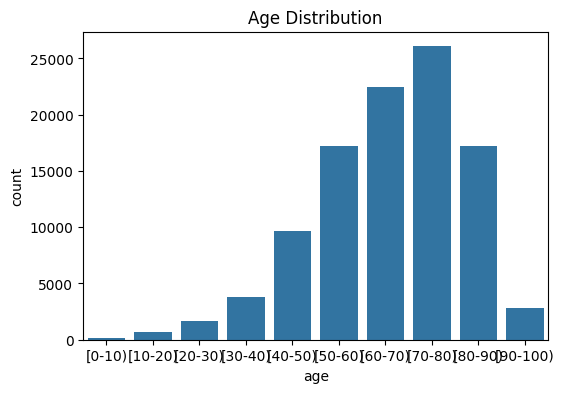

In [5]:

categorical_cols = [c for c in df.columns if df[c].dtype == 'object']
numerical_cols = [c for c in df.columns if np.issubdtype(df[c].dtype, np.number)]

plt.figure(figsize=(6,4))
if 'gender' in df.columns:
    sns.countplot(data=df, x='gender')
    plt.title('Gender Distribution')
    plt.show()

if 'age' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='age', order=sorted(df['age'].dropna().unique()))
    plt.title('Age Distribution')
    plt.show()


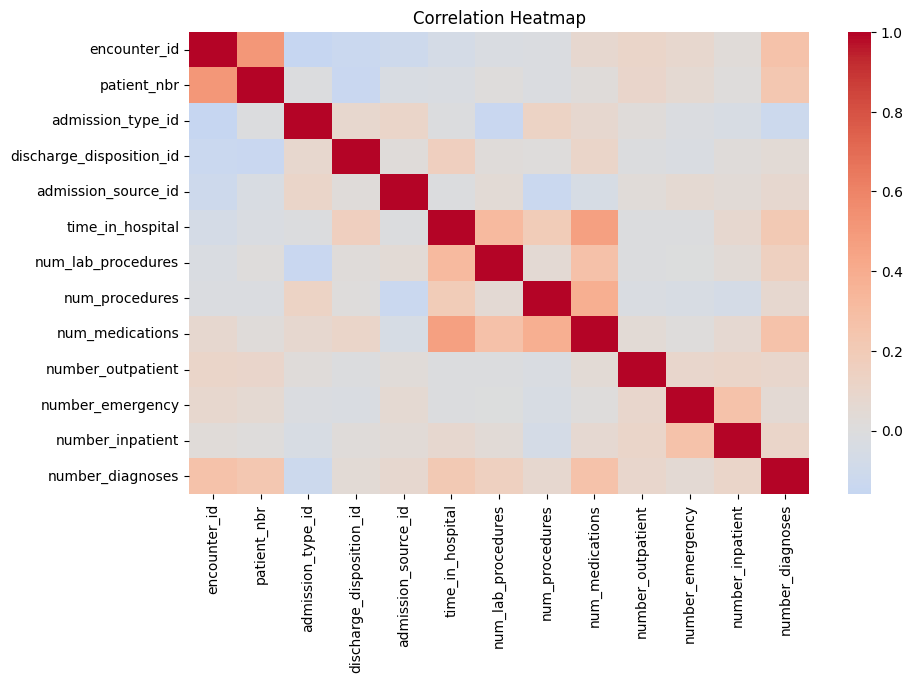

In [6]:

if len(numerical_cols) > 1:
    corr = df[numerical_cols].corr()
    plt.figure(figsize=(10,6))
    sns.heatmap(corr, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.show()


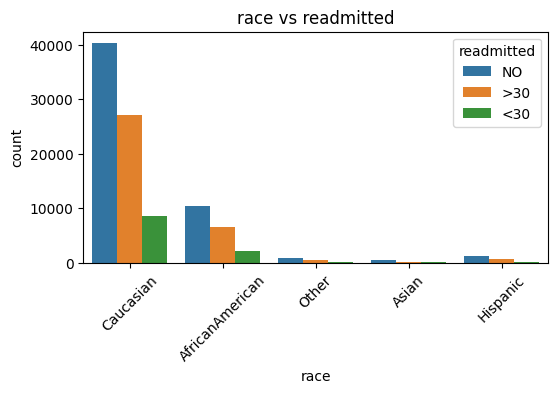

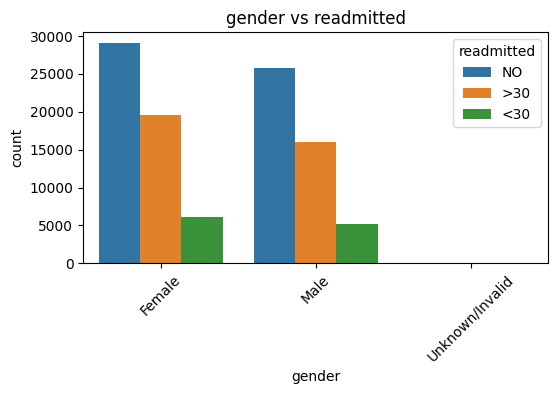

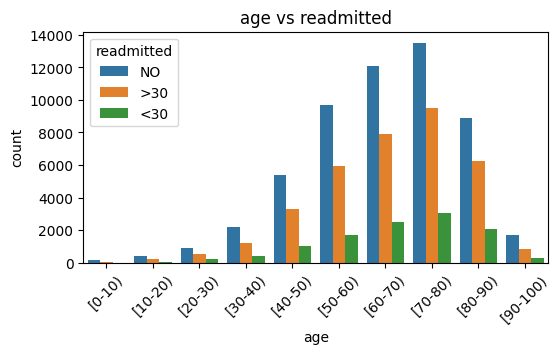

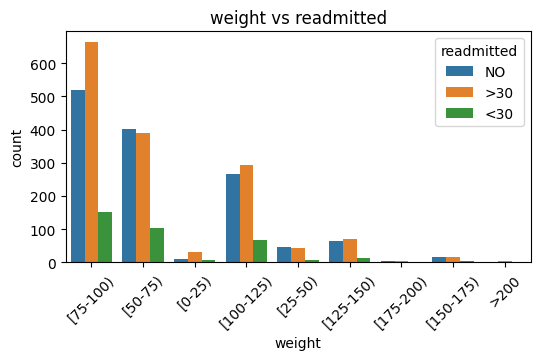

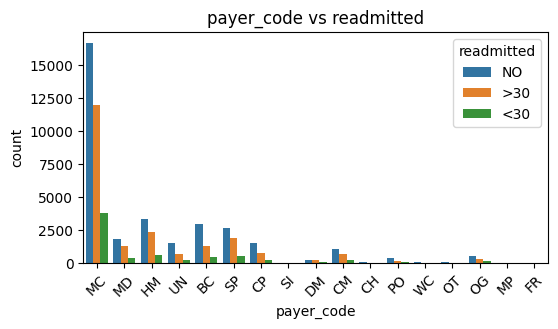

In [7]:

if target_candidates:
    target = target_candidates[0]
    for c in categorical_cols[:5]:
        plt.figure(figsize=(6,3))
        sns.countplot(data=df, x=c, hue=target)
        plt.title(f"{c} vs {target}")
        plt.xticks(rotation=45)
        plt.show()
